<a href="https://colab.research.google.com/github/ashritakodali/linearRegression/blob/main/Final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [3]:
! git clone https://www.github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 42 (delta 6), reused 2 (delta 2), pack-reused 30
Receiving objects: 100% (42/42), 2.49 MiB | 7.01 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./linearRegression/data/Q1_clean.csv')
df.columns

Index(['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type',
       'Room Type'],
      dtype='object')

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [5]:
# Part 1:
neighbor_means = df[["Price", "Neighbourhood "]].groupby("Neighbourhood ").mean()
neighbor_means

,Price
Neighbourhood,
Bronx,75.276498
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


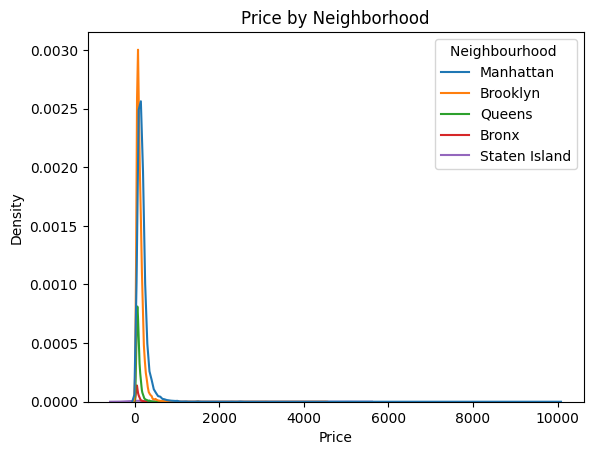

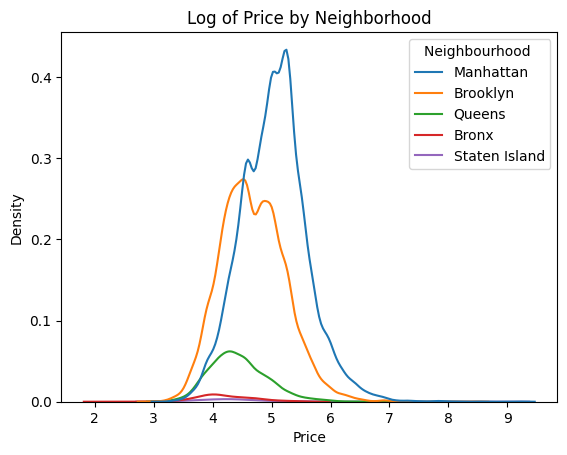

In [7]:
# Part 1 cont.:
sns.kdeplot(x=df["Price"], hue = df["Neighbourhood "]).set(title = "Price by Neighborhood")
plt.show()


sns.kdeplot(x=np.log(df["Price"]), hue = df["Neighbourhood "]).set(title = "Log of Price by Neighborhood")
plt.show() # add titles

In [8]:
# Part 2:
y = df['Price']
X = pd.get_dummies(df["Neighbourhood "], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


In [10]:
# Part 3:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(reg.intercept_)

75.27649769585331


In [11]:
# Part 3 cont.
results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_+reg.intercept_}) # Regression coefficients
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


In [14]:
# Part 4:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [15]:
# Part 5:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [16]:
y = df['Price']
df['nbhdXroom'] = df['Neighbourhood '].astype('str')+'X'+df['Room Type'].astype('str')
X = df.loc[:,['Review Scores Rating', 'nbhdXroom'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['nbhdXroom'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['nbhdXroom'], dtype='int')],
                    axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.2227250747073225
RMSE:  114.10298034724303


,variable,coefficient
0,Review Scores Rating,0.631849
1,BronxXEntire home/apt,63.133021
2,BronxXPrivate room,3.736301
3,BronxXShared room,-21.278036
4,BrooklynXEntire home/apt,113.784926
5,BrooklynXPrivate room,20.579025
6,BrooklynXShared room,-3.210858
7,ManhattanXEntire home/apt,169.494389
8,ManhattanXPrivate room,45.531833
9,ManhattanXShared room,24.553861


1. Looking at the average prices by neighborhood, the most expensive neighborhood is Manhattan.
2. Looking at the plot initially, it is quite difficult to discern which neighborhood is the most expensive. However, after performing a log transformation, we see that neighborhoods in Manhattan are the most expensive as they peak of the density plot is further to the right in comparison to the other neighborhoods, indicating that Manhattan is the most expensive neighborhood. Of the remaining neighborhoods, it appears that Brooklyn is the second most expensive. Looking at the coefficients of the linear regression model, the coefficients for each model are identical to the average price by neighborhood. This makes sense because when we use categorical variables, a model determines the mean response of a variable when that categorical variable is present, indicating that the coefficients should match that of the mean
3. Looking at the coefficients and the intercept, the new model makes the Bronx its reference class, meaning that the mean response when all of the other variables are not present will be equal to intercept of the model or the mean price in the Bronx. The intercept is equal to the average price in the bronx.
4. The R^2 is 0.067 while the RSME is 124.01. The coefficient for the Review Scores Rating is 1.032257. Based on the coefficients, the most expensive property will be in Manhattan and it will have a score of 100. Looking at the model, Manhattan has the highest coefficient of all the neighborhoods, indicating that it must be chosen to maximize the price. Looking at the Review score rating, the coefficent is positive, indicating that on average, as the rating increases, price will also increase. The most expensive property will cost 100 x 1.032257 + 89.421020 =  192.64 dollars each night.  
5. The R^2 is 0.22, while the RMSE is 114.27. The coefficient for Review Scores Rating is 0.626912. Looking at the model, Manhattan is still the most expensive place to live as it has a coefficient of 53.693304. Of the various types of building, an entire home or apartment is the most expensive as it has a coefficient of 110.617820. Finally. since the review score rating coefficient is positive, it will increase as the rating increases, meaning a rating of 100 will maximize the price. The most expensive proeprty would cost 110.617 + 53.69 + 0.0626 x 100 = 170.57 dollars
6. When multiple linear regression is conducted, a conditional expectation is used in order to generate the model. This means that as we add more predictors, each predictor will be dependent upon the predictors added before it. Since the new model now added another variable, room type, the coefficient for the review scores rating must change as the conditional expectation changed. Since our model has new information, the coefficients of said model will also be different.
7. Looking at the model, we see that the slope of review score rating becomes 0.631849, meaning it slightly increases from the previous model but does not change that significantly. Additionally, both the R^2 and the RSME barely change with the iteraction model as they 0.22 and 114.10 respectively. Looking at the model, different neighborhood and room types appear to have differne prices. While an apartment or home in Manhattan was the most expensive in our previous model, it appears that in our interaction model an entire home or apartment in Staten Island might be the most expensive as it would cost 297.96 dollars to rent.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: >

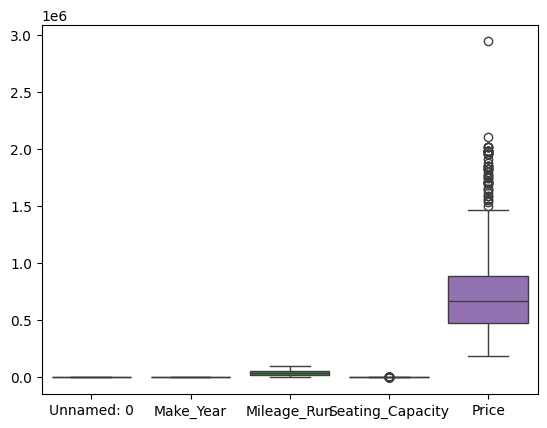

In [20]:
# part 1
df2 = pd.read_csv('./linearRegression/data/cars_hw.csv')
df0 = pd.read_csv('./linearRegression/data/cars_hw.csv')
sns.boxplot(data=df2)

<Axes: >

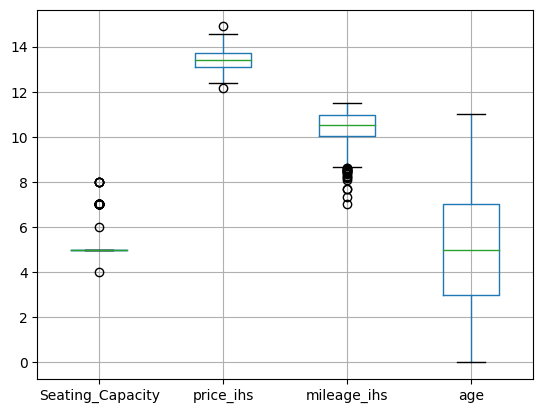

In [24]:
# part 1 cont
df2['price_ihs'] = np.log(df2['Price'])
df2['mileage_ihs'] = np.log(df2['Mileage_Run'])
df2['age'] = max(df2['Make_Year'])-df2['Make_Year']
df2 = df2.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
df2.boxplot()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


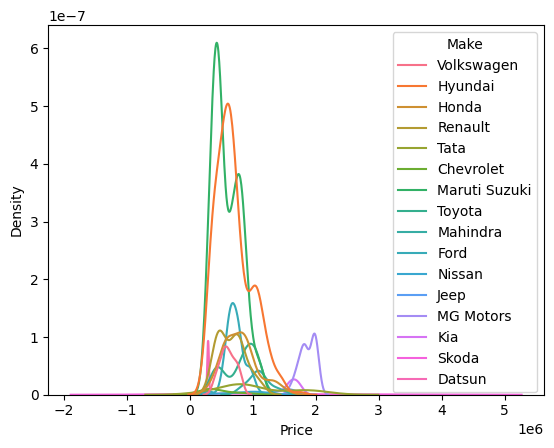

In [25]:

sns.kdeplot(data = df0, x='Price',hue='Make')
df0['Price'].groupby(df0['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,73.0,13.536318,0.336972,12.663497,13.272506,13.573439,13.726679,14.245343
Hyundai,305.0,13.368511,0.398781,12.421184,13.091904,13.366094,13.637579,14.370544
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
MG Motors,35.0,14.439052,0.066263,14.278615,14.395744,14.429615,14.497597,14.518113
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366


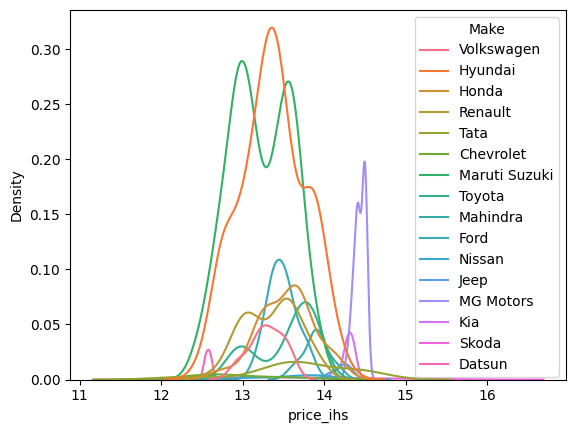

In [26]:
sns.kdeplot(data=df2,x='price_ihs',hue='Make')
df2['price_ihs'].groupby(df2['Make']).describe()

In [27]:
N = df2.shape[0]
df2 = df2.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df2[0:train_size]
y_train = df_train['price_ihs']

df_test = df2[train_size:]
y_test = df_test['price_ihs']

In [28]:
from sklearn import linear_model

var_n = ['age','mileage_ihs','Seating_Capacity']
X_train_n = df_train.loc[:,var_n]
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train)
X_test_n = df_test.loc[:,var_n]
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test))
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n)

Numeric only Rsq:  0.45254262375133003
Numeric only RMSE:  0.33392654730219595


In [30]:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat:
    new_dummies = pd.get_dummies( df2.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]
reg_c = linear_model.LinearRegression().fit(X_train_c,y_train)
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test))
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c)

Categorical only Rsq:  0.6298129532403878
Categorical only RMSE:  0.27459106425280566


In [31]:

X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test))
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all)

All Rsq:  0.7999206763900731
All RMSE:  0.2018723768553813


In [32]:

from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data=Z, columns = names)
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test))
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all)

1  Rsq:  0.7999206763900731
1 RMSE:  0.2018723768553813
2  Rsq:  0.8025408093753365
2 RMSE:  0.20054621393437888
3  Rsq:  0.7996599799116076
3 RMSE:  0.20200385042553037
4  Rsq:  -20919223391.00493
4 RMSE:  65275.25393960362


<Axes: xlabel='price_ihs'>

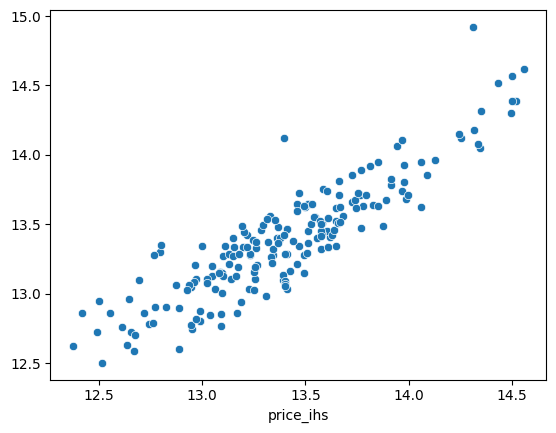

In [33]:
d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data=Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data=Z, columns = names)
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

sns.scatterplot(x=y_test,y=y_hat_all)

<Axes: xlabel='price_ihs', ylabel='Density'>

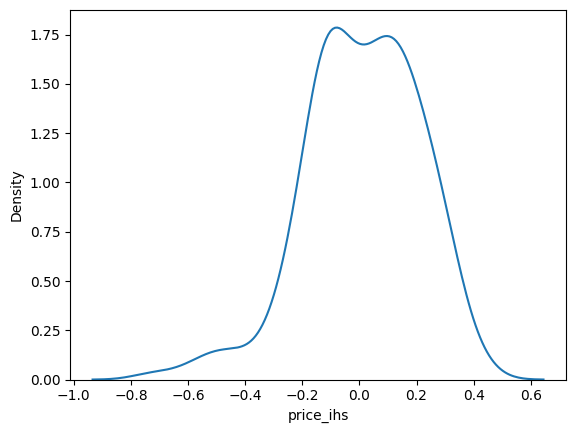

In [34]:
sns.kdeplot(residuals)

In [35]:
from sklearn import tree

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d)
    cart = model.fit(X_train_all, y_train)
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test))


Depth:  2 , RMSE:  0.30146124904266147 , Rsq:  0.5538186573009525
Depth:  3 , RMSE:  0.2708659626218513 , Rsq:  0.6397887383319487
Depth:  4 , RMSE:  0.24859265755702614 , Rsq:  0.6965934082540013
Depth:  5 , RMSE:  0.2355172171932646 , Rsq:  0.7276710948879903
Depth:  6 , RMSE:  0.24243086639085376 , Rsq:  0.7114478964042676
Depth:  7 , RMSE:  0.22726431106279263 , Rsq:  0.7464223930261478
Depth:  8 , RMSE:  0.2262936478611834 , Rsq:  0.7485838658297308
Depth:  9 , RMSE:  0.2243051420473783 , Rsq:  0.7529829807132395
Depth:  10 , RMSE:  0.22639272557635842 , Rsq:  0.7483636635442642
Depth:  11 , RMSE:  0.23514435899801958 , Rsq:  0.7285326852965157
Depth:  12 , RMSE:  0.23246530345722005 , Rsq:  0.7346832304551554
Depth:  13 , RMSE:  0.2376013536595163 , Rsq:  0.7228299891834078
Depth:  14 , RMSE:  0.23159572087411298 , Rsq:  0.7366644579421019
Depth:  15 , RMSE:  0.23432424375712152 , Rsq:  0.7304229814612151
Depth:  16 , RMSE:  0.2340627100387192 , Rsq:  0.7310244056569446
Depth:  1

1. I think a log transformation would be the best as it will take care of the extremely large values but still provide an interpretable variable.
2. It appears that MG motors and then followed by Kia are the most expensive car brands. Generally, the prices for both these car brands are in the lower 6 figures while most of the other cars are priced in a moderate 5 figure range.
4. The R^2 and RMSE for the numeric only model is 0.45 and 0.33 respectively. The R^2 and RMSE for the categorical only model is 0.63 and 0.27 respectively. Finally, the moedl that has all the regressors has a R^2 and and RMSE of 0.80 and 0.20 repsectively.
5. As I increased the degree of expansion the R^2 drastically decreases at a degree of 4, it becomes extremely negative. Additionally, as I increased the degree of expansion, the RMSE drastically increases at degree 4 as well.
6. Looking at the plot of predicted and actural values, it appears that the predicted values and the true values roughly line up along the diagnol. Looking at the plot of the residuals, the plot is somewhat bell shaped as it has 2 main peaks that are centered near 0. However, it appears to be slighly left skewed, indicating that the residuals might not be normally distributed. The model likely meets assumptions as the normality assumption is robust and we have a large sample size. The overall model itself is pretty useful as it has a high R^2 value and a low RMSE value.